In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from ase.io import read
from tqdm import tqdm_notebook as tqdm

from tensorwaves.potentials import Potential
from tensorwaves.waves import PlaneWaves
from tensorwaves import plotutils
from tensorwaves.potentials import Potential

In [2]:
tf.enable_eager_execution()

In [1]:
n = 1
atoms = read('hbn.cif')

atomic_numbers = atoms.get_atomic_numbers()

cell = atoms.get_cell()
cell[2,2]*=1
atoms.set_cell(cell)
atoms.center()

atoms *= (n*3, n*2, 1)

potential = Potential(atoms, sampling = (.005,.005))
sliced_potential = potential.slice(6, tolerance=.1e-2)

#print(potential, len(atoms))

#for i in tqdm(range(8*10**6//len(atoms))):
#sliced_potential[0].tensor(10)
#plotutils.show_atoms(potential_slice, 'xz', scale=70)

NameError: name 'read' is not defined

In [ ]:
from tensorwaves.waves import ProbeWaves
from tensorwaves.ctf import CTF

probe = ProbeWaves(100e-3, defocus=0, energy=200e3, extent=(5/3,5/3), sampling=(.02,.02), rolloff=0e-3)

probe.show(mode='real', space='direct')

#p = probe._tensor()


#plt.imshow(ctf._tensor().numpy().real)

84.0


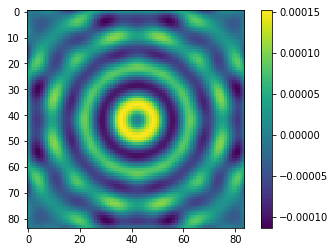

In [84]:
plt.imshow((probe.build()._tensor - waves.build().probe(2.5,2.5)).numpy()[0].real)
plt.colorbar()

84.0


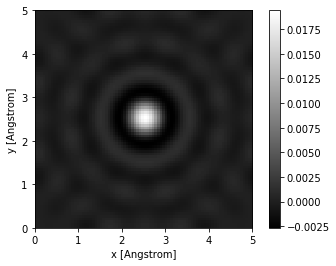

In [83]:
from tensorwaves.waves import PrismWaves
from tensorwaves import utils
from math import pi

waves = PrismWaves(100e-3, 3, energy=200e3, extent=(5,5), sampling=(.02,.02))

#waves.show(10,mode='real',space='fourier')

waves.show_probe('real',space='direct')

#= waves.build()
#x,y = 2.5, 1
#probe = scattering.probe(x, y)

#plt.imshow(tf.real(probe).numpy())

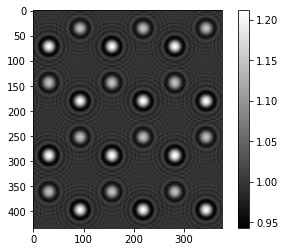

In [30]:

waves = waves.build()

waves.multislice(sliced_potential)

#waves.apply_ctf(defocus=4)

#waves.transmit(slice_tensor)

waves.show_image()